In [1]:
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def getNormed(this_array, this_min = 0, this_max = 255, set_to_int = True):
    new_var = this_array.copy()
    rat = (this_max - this_min)/(new_var.max() - new_var.min())
    new_var = new_var * rat
    new_var -= new_var.min()
    new_var += this_min
    if set_to_int:
        return new_var.astype('uint8')
    return new_var

In [3]:
def pad_img(dcm):
    # Get the current image size
    image_height, image_width = dcm.Rows, dcm.Columns

    # Calculate padding dimensions
    padding_height = max(71 - image_height, 0)
    padding_width = max(71 - image_width, 0)

    # Calculate the top, bottom, left, and right padding
    top_padding = padding_height // 2
    bottom_padding = padding_height - top_padding
    left_padding = padding_width // 2
    right_padding = padding_width - left_padding

    # Create a black pixel (pixel value of 0)
    black_pixel = 0

    # Pad the DICOM pixel data with black pixels
    padded_data = np.pad(
        getNormed(dcm.pixel_array),
        ((top_padding, bottom_padding), (left_padding, right_padding)),
        constant_values=black_pixel
    )

    return padded_data

In [4]:
def get_data(img):
    dcm = []
    # Iterate through the DataFrame rows
    #for img in data:
    # Construct the full path to the DICOM image file
    dcm1 = pydicom.dcmread(img)
    #dcm = dcm1.pixel_array
    #dcm = getNormed(dcm1)
    dcm = pad_img(dcm1)
    
    return dcm

In [5]:
original = pd.read_csv('/home/aalmansour/source/lidc_slices/lidc_files/image_label_mapping.csv')
test_un = pd.read_csv('/home/aalmansour/source/lidc_slices/test_uncertainty_stats.csv')
test_un.rename(columns={'Image_ID': 'instance_id'}, inplace=True)
merged_test_un = pd.merge(original, test_un, on='instance_id', how='inner')
display(merged_test_un)

,nodule_id,instance_id,image,label,agreement,radiologist_id,True_Label,Mean_Prediction,Prediction_STD,Difference_T-P,all_sample_predictions_std,all_sample_predictions100
0,1,7,/home/aalmansour/source/lidc_slices/crops/7.dcm,5,2,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
1,1,18,/home/aalmansour/source/lidc_slices/crops/18.dcm,5,2,3,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,1,30,/home/aalmansour/source/lidc_slices/crops/30.dcm,5,2,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,3,88,/home/aalmansour/source/lidc_slices/crops/88.dcm,5,1,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,3,89,/home/aalmansour/source/lidc_slices/crops/89.dcm,5,1,1,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4424,2690,38006,/home/aalmansour/source/lidc_slices/crops/3800...,5,1,4,5,4.50,0.866025,0.50,0.866025,"[5, 5, 5, 5, 3, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, ..."
4425,2690,38007,/home/aalmansour/source/lidc_slices/crops/3800...,5,1,4,5,3.00,0.000000,2.00,0.000000,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4426,2690,38010,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,5.00,0.000000,0.00,0.000000,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4427,2690,38011,/home/aalmansour/source/lidc_slices/crops/3801...,5,1,4,5,4.85,0.357071,0.15,0.357071,"[5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, ..."


In [6]:
# Assuming you have a DataFrame named 'test'

# Define the conditions for row selection
label_condition = merged_test_un['label'] == 5  # Replace with the desired 'label' value
agreement_condition = merged_test_un['agreement'] == 3  # Replace with the desired 'agreement' value

# Apply the conditions to filter rows
filtered_rows = merged_test_un[label_condition & agreement_condition]

# Access all columns and values from the filtered rows
filtered_values = filtered_rows.values

# Print the filtered values
print("Filtered Values:")
print(len(filtered_values))

Filtered Values:
36


In [7]:
filtered_values[35][2]

'/home/aalmansour/source/lidc_slices/crops/35126.dcm'

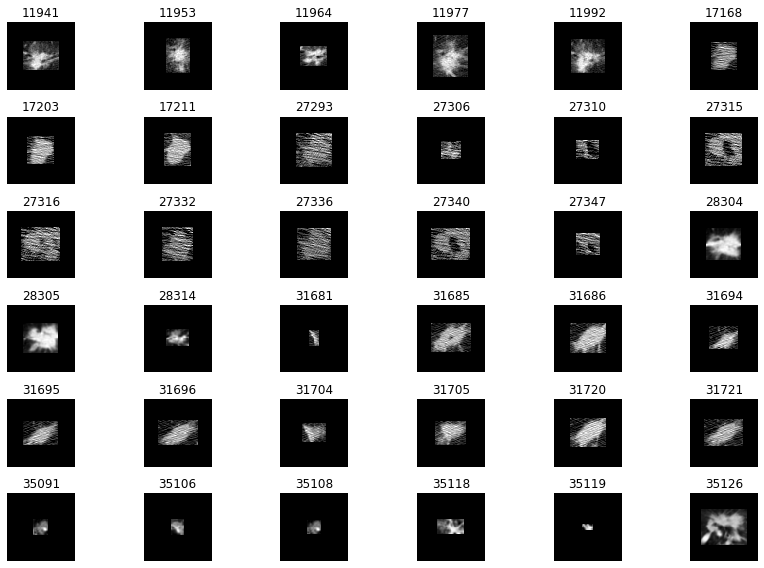

In [11]:
# Create subplots to display the images
num_images = len(filtered_values)
num_rows = 6  # Number of rows in the grid
num_cols = num_images // num_rows + (num_images % num_rows > 0)  # Adjust to fit all images

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        pixel_data = get_data(filtered_values[i][2])
        ax.imshow(pixel_data, cmap='gray')
        ax.set_title(filtered_values[i][1])
        ax.axis("off")  # Turn off axis labels

plt.tight_layout()
plt.show()


In [12]:
# Define the conditions for row selection
label_condition = merged_test_un['label'] == 1  # Replace with the desired 'label' value
agreement_condition = merged_test_un['agreement'] == 3  # Replace with the desired 'agreement' value

# Apply the conditions to filter rows
filtered_rows = merged_test_un[label_condition & agreement_condition]

# Access all columns and values from the filtered rows
filtered_values = filtered_rows.values

# Print the filtered values
print("Filtered Values:")
print(len(filtered_values))

Filtered Values:
226


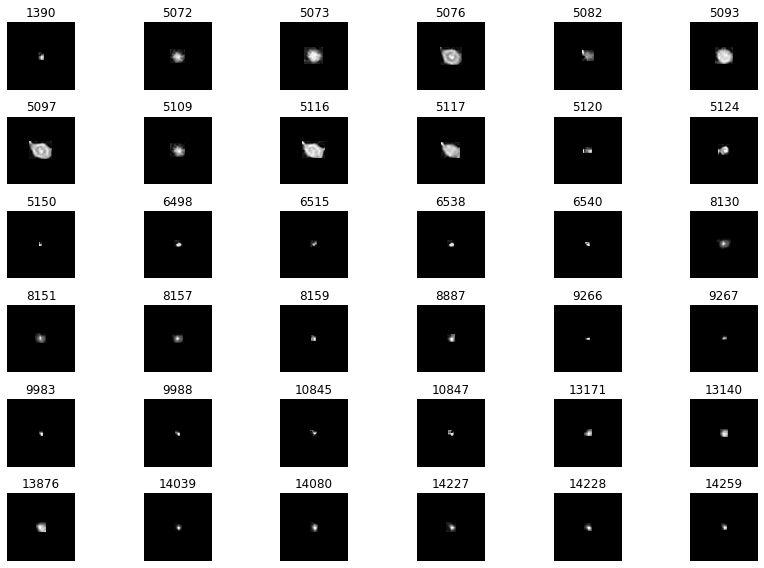

In [14]:
# Create subplots to display the images
num_images = 36
num_rows = 6  # Number of rows in the grid
num_cols = num_images // num_rows + (num_images % num_rows > 0)  # Adjust to fit all images

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        pixel_data = get_data(filtered_values[i][2])
        ax.imshow(pixel_data, cmap='gray')
        ax.set_title(filtered_values[i][1])
        ax.axis("off")  # Turn off axis labels

plt.tight_layout()
plt.show()